In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


This snippet of code adds the source code to the PYTHONPATH.  It assumes that the notebook and source directories are under the same parent directory.  If the directory structure has been changed then os.path.join(sys.path[0],'..','source') will need to be replaced with the new path to source.  This isn't a very clean solution but it is the only one I can find that will work.

In [3]:
import sys
import os
sys.path.append(os.path.join(sys.path[0],'..','source'))

## Read spectral libraries

In [4]:
from spectral.io import envi
from constants import import ICE_LIBRARY_PATH, POND_LIBRARY_PATH, OWTR_LIBRARY_PATH

# Ice
ice = envi.open(ICE_LIBRARY_PATH)
# Ponds
pond = envi.open(POND_LIBRARY_PATH)
# Leads
lead = envi.open(OWTR_LIBRARY_PATH)

SyntaxError: invalid syntax (<ipython-input-4-bee7f1f0b574>, line 2)

## Get indices for dark, light and ponds with ice

In [1]:
import re
import np
isdark = re.compile('dark', re.IGNORECASE)
dark_idx = np.array([i for i, tgt in enumerate(pond.names) if isdark.search(tgt)])

islight = re.compile('light', re.IGNORECASE)
light_idx = np.array([i for i, tgt in enumerate(pond.names) if islight.search(tgt)])

isice = re.compile('brash|frazil', re.IGNORECASE)
ice_idx = np.array([i for i, tgt in enumerate(pond.names) if isice.search(tgt)])

isother = re.compile('^dark|^light|^brash|^frazil', re.IGNORECASE)
other_idx = np.array([i for i, tgt in enumerate(pond.names) if isother.search(tgt)])


NameError: name 'np' is not defined

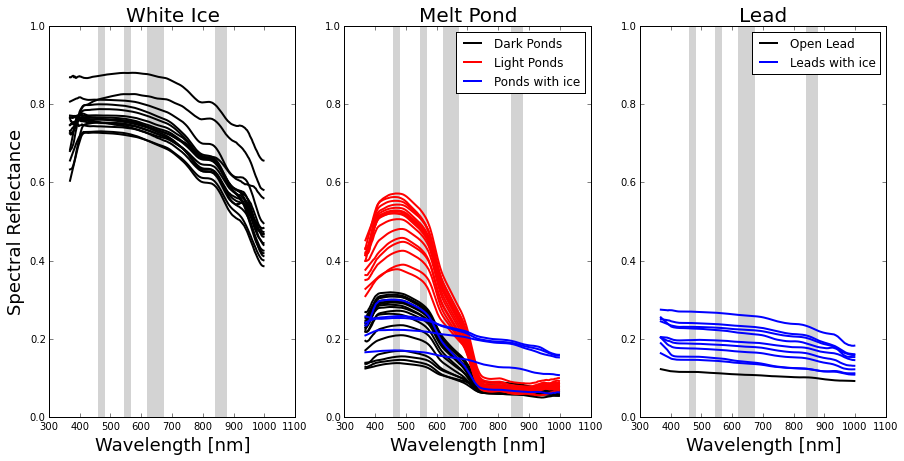

In [6]:
import matplotlib.pyplot as plt
from shebaspectral import add_modis_bands

xmin = 300.
xmax = 1100.

f, ax = plt.subplots(1,3, figsize=(15,7))

ax[0].plot(ice.bands.centers, ice.spectra.T, 'k', lw=2)
ax[0].set_xlim(xmin,xmax)
ax[0].set_ylim(0.,1.)
ax[0].set_title("White Ice", fontsize=20)
ax[0].set_ylabel("Spectral Reflectance", fontsize=18)
ax[0].set_xlabel("Wavelength [nm]", fontsize=18)
add_modis_bands(ax=ax[0])

ax[1].plot(pond.bands.centers, pond.spectra[dark_idx,:].T, 'k', lw=2, label="Dark")
ax[1].plot(pond.bands.centers, pond.spectra[light_idx,:].T, 'r', lw=2, label="light")
ax[1].plot(pond.bands.centers, pond.spectra[ice_idx,:].T, 'b', lw=2, label="ice")
ax[1].set_xlim(xmin,xmax)
ax[1].set_ylim(0.,1.)
ax[1].set_title("Melt Pond", fontsize=20)
add_modis_bands(ax=ax[1])
ax[1].set_xlabel("Wavelength [nm]", fontsize=18)

# Set up legend for pond plot
import matplotlib.lines as mlines
darkpond_line = mlines.Line2D([], [], color='k', lw=2,
                          label='Dark Ponds')
lightpond_line = mlines.Line2D([], [], color='r', lw=2,
                          label='Light Ponds')
icepond_line = mlines.Line2D([], [], color='b', lw=2,
                          label='Ponds with ice')
ax[1].legend(handles=[darkpond_line, lightpond_line, icepond_line])

ax[2].plot(lead.bands.centers, lead.spectra[0,:].T, 'k', lw=2, label='Open Lead')
ax[2].plot(lead.bands.centers, lead.spectra[1:,:].T, 'b', lw=2, label='Leads with ice')
ax[2].set_xlim(xmin,xmax)
ax[2].set_ylim(0.,1.)
ax[2].set_title("Lead", fontsize=20)
add_modis_bands(ax=ax[2])
ax[2].set_xlabel("Wavelength [nm]", fontsize=18)

openlead_line = mlines.Line2D([], [], color='k', lw=2,
                          label='Open Lead')
icelead_line = mlines.Line2D([], [], color='b', lw=2,
                          label='Leads with ice')
ax[2].legend(handles=[openlead_line,icelead_line])

#plotfile = ''
#f.savefig(plotfile)